# Eksploracyjna analiza danych i klasteryzacja 

## 1. Analiza danych 

### 1.1 Wczytanie danych bazowych

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [59]:
original_data = pd.read_json("cocktail_dataset.json")

In [60]:
original_data

,id,name,category,glass,tags,instructions,imageUrl,alcoholic,createdAt,updatedAt,ingredients
0,11000,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:17.000+00:00,2024-08-18T19:06:16.000+00:00,"[{'id': 170, 'name': 'Soda water', 'descriptio..."
1,11001,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 513, 'name': 'Water', 'description': '..."
2,11002,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 305, 'name': 'Light Rum', 'description..."
3,11003,Negroni,Ordinary Drink,Old-fashioned glass,"[IBA, Classic]","Stir into glass over ice, garnish and serve.",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 482, 'name': 'Sweet Vermouth', 'descri..."
4,11004,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[IBA, Classic, Alcoholic, ContemporaryClassic]","Shake with ice. Strain into chilled glass, gar...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:59.000+00:00,2024-08-18T19:06:18.000+00:00,"[{'id': 409, 'name': 'Powdered Sugar', 'descri..."
...,...,...,...,...,...,...,...,...,...,...,...
129,11985,Quarter Deck Cocktail,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:43.000+00:00,2024-08-18T19:11:43.000+00:00,"[{'id': 305, 'name': 'Light Rum', 'description..."
130,11987,Queen Bee,Ordinary Drink,Cocktail glass,None,"Shake all ingredients with ice, strain into a ...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:44.000+00:00,2024-08-18T19:11:44.000+00:00,"[{'id': 137, 'name': 'Coffee Brandy', 'descrip..."
131,11989,Queen Charlotte,Ordinary Drink,Collins glass,None,Pour red wine and grenadine into a collins gla...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:45.000+00:00,2024-08-18T19:11:45.000+00:00,"[{'id': 250, 'name': 'Grenadine', 'description..."
132,11991,Queen Elizabeth,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:45.000+00:00,2024-08-18T19:11:45.000+00:00,"[{'id': 2, 'name': 'Gin', 'description': 'Gin ..."


### 1.2 Wizualna analiza zbioru 

Patrząc na zbiór, można odrzucić takie kolumny jak :
- id
- imageUrl
- createdAt
- updatedAt	

Ze względu na brak posiadania jakichkolwiek informacji o elementach zbioru

In [61]:
original_data["ingredients"][0][0]

{'id': 170,
 'name': 'Soda water',
 'description': None,
 'alcohol': 1,
 'type': None,
 'percentage': None,
 'imageUrl': None,
 'createdAt': '2024-08-18T19:01:57.000+00:00',
 'updatedAt': '2024-08-18T19:01:57.000+00:00'}

Dla obiektów typu JSON w liście składników, można również odrzucić :
- updatedAt 
- createdAt
- imageUrl
- id 

Ze względu na zerowe informacje, oraz : 
- type - ze względu na wiele wystąpień None 
- alcohol - wszystkie koktajle w danych są alkoholowe (zbędna informacja)
- description - opis składnika, nie wykazuje jakiejkolwiek korelacji z koktajlem 

### 1.3 Analiza wartości null oraz NaN

In [62]:
original_data.isna().value_counts()

id     name   category  glass  tags   instructions  imageUrl  alcoholic  createdAt  updatedAt  ingredients
False  False  False     False  True   False         False     False      False      False      False          99
                               False  False         False     False      False      False      False          35
Name: count, dtype: int64

In [63]:
original_data[original_data["tags"].isna()].count()

id              99
name            99
category        99
glass           99
tags             0
instructions    99
imageUrl        99
alcoholic       99
createdAt       99
updatedAt       99
ingredients     99
dtype: int64

Po wstępnej analizie - na 133 próbek 99 nie posiada tagów, co wynosi ok. 74,4% - można śmiało odrzucić tą kolumnę, ze względu na to, że dotyczy 1/4 zbioru danych.

### 1.4 Wizualna analiza zbioru

Nie można dokonać wizualnej analizy zbioru, ze względu na kategorialny typ danych - dane zostają poddane 
przeprocesowaniu w celu stworzenia lepszych cech do wizualizacji oraz klasteryzacji zbioru

## 2. Przeprocesowanie danych i inżynieria cech

### 2.1 Wstępne czyszczenie

Zgodnie z wcześniejszą analizą cech zbioru, wiele kolumn uległo usunięciu ze zbioru, natomiast te zachowane, uległy przekształceniu w cechy liczbowe, lub kategorialne z wykrozystaniem kodownaia one-hot lub label encoding. Podczas oczyszczania danych poza usunięciem wybranych cech, została oczyszczona lista składników, tak, żeby zawierała jedynie pola : percentage oraz name. 

### 2.2 Preprocessing

Na tym etapie zostały utworzone nowe cechy zbioru danych lub zastąpione innymi reprezentacjami :
- glass - zastosowane zostało kodowanie etykietowe  :

        "Cocktail glass": 1,
        "Old-fashioned glass": 2,
        "Highball glass": 3,
        "Whiskey sour glass": 4,
        "Collins glass": 5,
        "Champagne flute": 6,
        "Pousse cafe glass": 7,
        "Copper Mug": 8,
        "Whiskey Glass": 9,
        "Brandy snifter": 10,
        "White wine glass": 11,

- instructions_length - określa ilość liter w instrukcji
- mean_alcohol_percentage - określa średnią zawartość alkoholu w koktajlu
- ingredients - zastąpione ilością składników 
- complexity_score - określa złożność przygotowania koktajlu ze wzoru $v * 0.7 + u * 0.3$ 

gdzie v - ilość czasowników, u - ilość unikalnych czasowników

- Cocktail,Ordinary Drink,Punch / Party Drink - one-hot encoding dla cechy category

Do zbioru zostało także dodane 10 głównych składowych operacji PCA, powstałych z przetworzenia kategoralnego listy nazw składników vectorizerem, i zredukowanych w celu uniknięcia rzadkiej macierzy cech ( 133x133 )

In [64]:
preprocessed_data = pd.read_csv("data.csv")
preprocessed_data = preprocessed_data.drop(["Unnamed: 0"],axis=1)

In [65]:
preprocessed_data

,glass,ingredients,instruction_length,mean_alcohol_percentage,complexity_score,Cocktail,Ordinary Drink,Punch / Party Drink,ingredient_pc1,ingredient_pc2,ingredient_pc3,ingredient_pc4,ingredient_pc5,ingredient_pc6,ingredient_pc7,ingredient_pc8,ingredient_pc9,ingredient_pc10
0,3,5,177,10,10.0,1,0,0,-0.014982,-0.461044,-0.001451,0.000179,0.001613,-0.000576,-0.001449,-0.000419,0.002629,0.000145
1,2,4,218,10,6.0,1,0,0,-0.014982,-0.012421,-0.034134,-0.045671,-0.008036,0.016704,0.007225,0.001757,-0.023009,-0.001688
2,3,6,152,20,6.0,0,1,0,-0.014982,-0.002642,-0.011711,-0.026448,-0.012697,0.009632,-0.000429,-0.002246,0.004643,0.000103
3,2,3,44,13,4.0,0,1,0,-0.014982,-0.002949,0.052105,0.108178,0.056743,0.001193,-0.006432,-0.076796,-0.047359,0.105207
4,2,4,148,10,10.0,0,1,0,-0.014982,-0.003502,-0.015766,0.031992,-0.056972,-0.048061,-0.033045,-0.092794,0.016542,0.032227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1,3,71,10,6.0,0,1,0,-0.014982,-0.004414,0.017749,-0.004752,-0.032715,0.529239,-0.019800,0.044969,-0.030542,-0.071467
130,1,3,72,10,6.0,0,1,0,-0.014982,-0.003971,-0.125697,-0.016535,0.040443,0.045530,0.033738,-0.197780,-0.160128,-0.034412
131,5,3,108,4,4.0,0,1,0,-0.014982,-0.004499,-0.003980,-0.010060,-0.030938,0.172418,0.067472,0.009326,-0.020252,0.275584
132,1,3,71,13,6.0,0,1,0,-0.014982,-0.003732,0.082738,0.005416,-0.166065,0.001145,0.051062,-0.028881,0.022292,0.058775


In [66]:
preprocessed_data[["ingredients","instruction_length","mean_alcohol_percentage","complexity_score"]].describe()

,ingredients,instruction_length,mean_alcohol_percentage,complexity_score
count,134.000000,134.000000,134.000000,134.000000
mean,3.962687,128.126866,10.798507,6.186567
std,1.270881,50.517089,4.390317,2.124571
min,2.000000,44.000000,2.000000,1.000000
25%,3.000000,82.500000,9.000000,4.000000
50%,4.000000,118.000000,10.000000,6.000000
75%,5.000000,158.750000,13.000000,8.000000
max,6.000000,301.000000,34.000000,10.000000


Do tak przygotowanych danych można sporządzić analizę graficzną oraz przystąpić do klasteryzacji zbioru

### 2.3 Wizualna analiza cech przkształconego zbioru

#### 2.3.1 Histogramy cech

array([[<Axes: title={'center': 'glass'}>,
        <Axes: title={'center': 'instruction_length'}>],
       [<Axes: title={'center': 'mean_alcohol_percentage'}>,
        <Axes: title={'center': 'complexity_score'}>],
       [<Axes: title={'center': 'ingredients'}>, <Axes: >]], dtype=object)

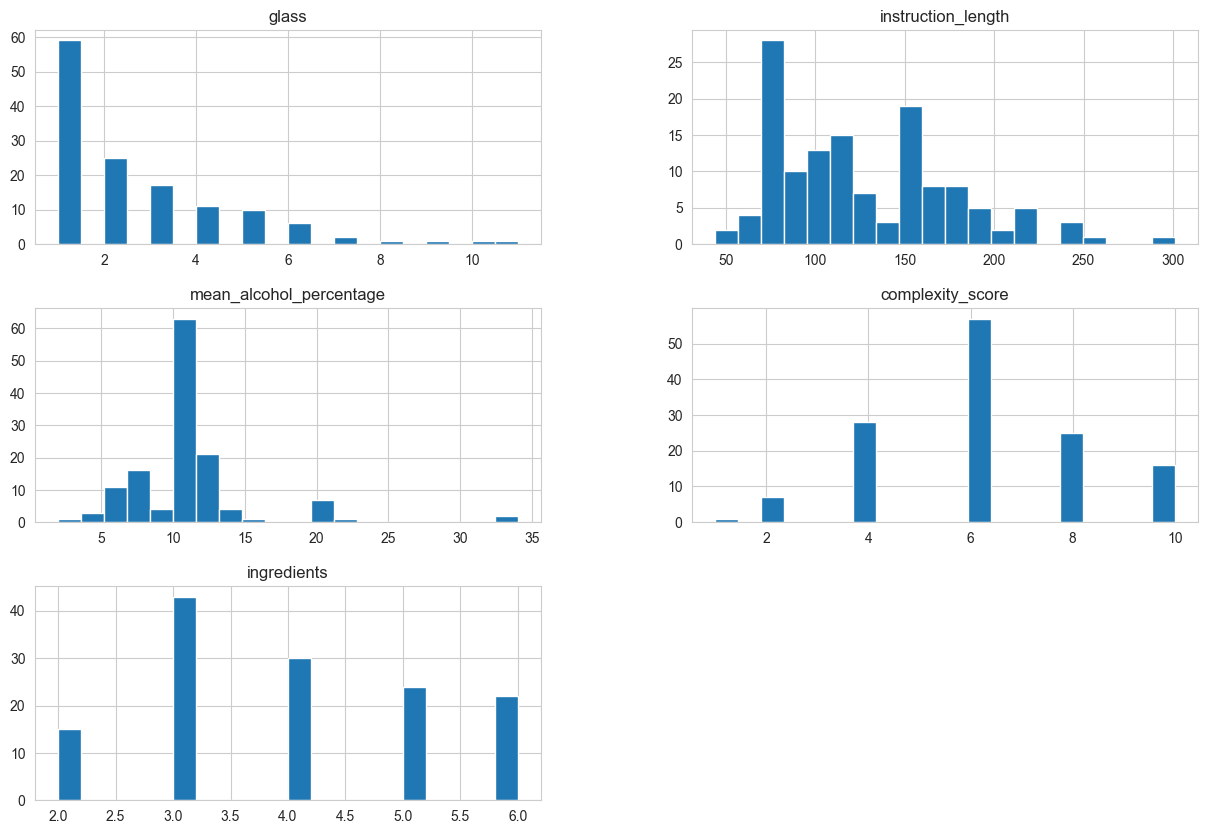

In [67]:
hist_cols = ["glass", "instruction_length","mean_alcohol_percentage","complexity_score","ingredients"]

preprocessed_data.hist(figsize=(15,10),column=hist_cols,bins=20)

Analizując histogramy, można dojść do kilku konkluzji w nowych rodzajach danych : 
- najwięcej koktajli jest serwowanych w szklance typu "Cocktail Glass" - ok 60
- długośc instrukcji opisana jest rozkładem prawie bimodalnym z skokiem w punkcie 75
- średnia zawartość alkoholu plasuje się w granicach 10-15 %
- złożność przygotowania koktajlu opisana jest rozkładem gaussa (normalnym)
- najwięcej koktajli jest złożona z trzech koktajli

Dodatkowo analizując głowne cechy liczbowe : instruction_length, mean_alcohol_percentage oraz complexity_score, otrzymuje następujące wykresy :

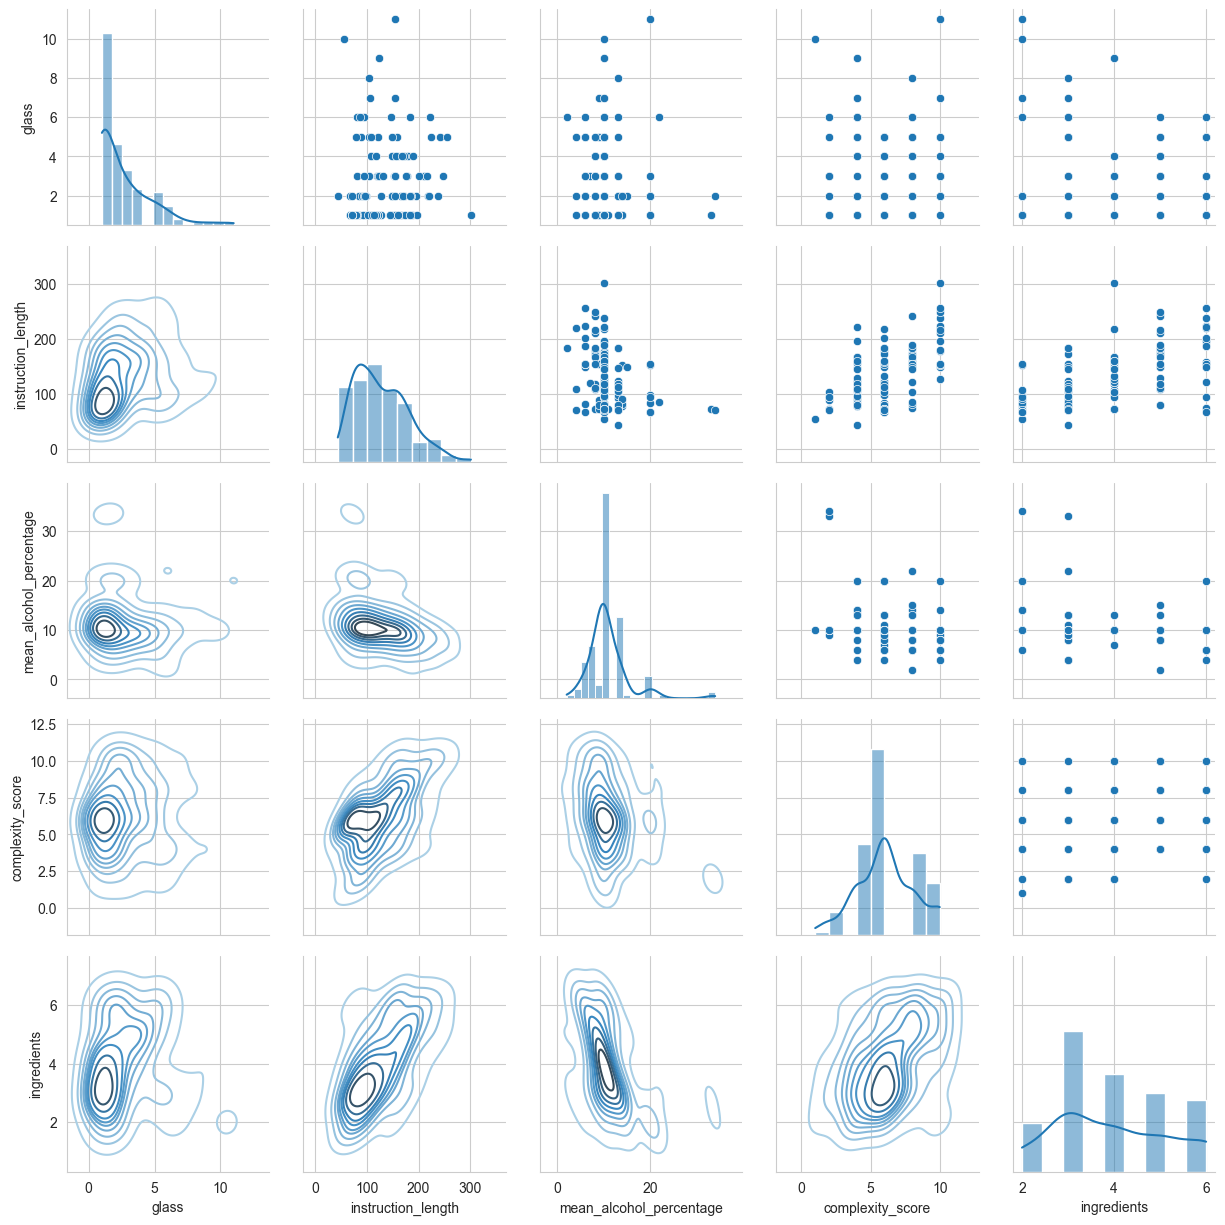

In [68]:
g = sns.PairGrid(preprocessed_data, vars=hist_cols)
g = g.map_upper(sns.scatterplot)
g = g.map_diag(sns.histplot, kde=True)
g = g.map_lower(sns.kdeplot, cmap='Blues_d')

plt.show()


Bazując na wykresach zależnościowych, można wysnuć kilka wniosków : 

- glass vs. instruction_length: wartości niższe przeważają, czyli prostsze przepisy używają bardziej popularnych szkieł.

- glass vs. mean_alcohol_percentage: większość popularnych szkieł używana jest do koktajli o niższym stężeniu alkoholu.

- glass vs. complexity_score: popularne szkła są stosowane zarówno w prostszych, jak i bardziej złożonych przepisach.

- instruction_length vs. mean_alcohol_percentage: krótsze przepisy mają niższe wartości alkoholu.

- instruction_length vs. complexity_score: krótsze przepisy są przeważnie prostsze.

- mean_alcohol_percentage vs. complexity_score: Niższe stężenie alkoholu koreluje z niższą złożonością przepisu.

- ingredients vs. complexity_score: bardziej skomplikowane koktajle często mają bardziej zróżnicowane składniki.

- ingredients vs. instruction_length: dłuższe instrukcje sugerują użycie większej liczby składników.

- ingredients vs. mean_alcohol_percentage: koktajle o wyższym stężeniu alkoholu często zawierają mniej różnorodne składniki.

- ingredients vs. glass: niektóre typy szkła są używane z określonymi składnikami, co może wynikać z tradycji lub najlepszych praktyk.

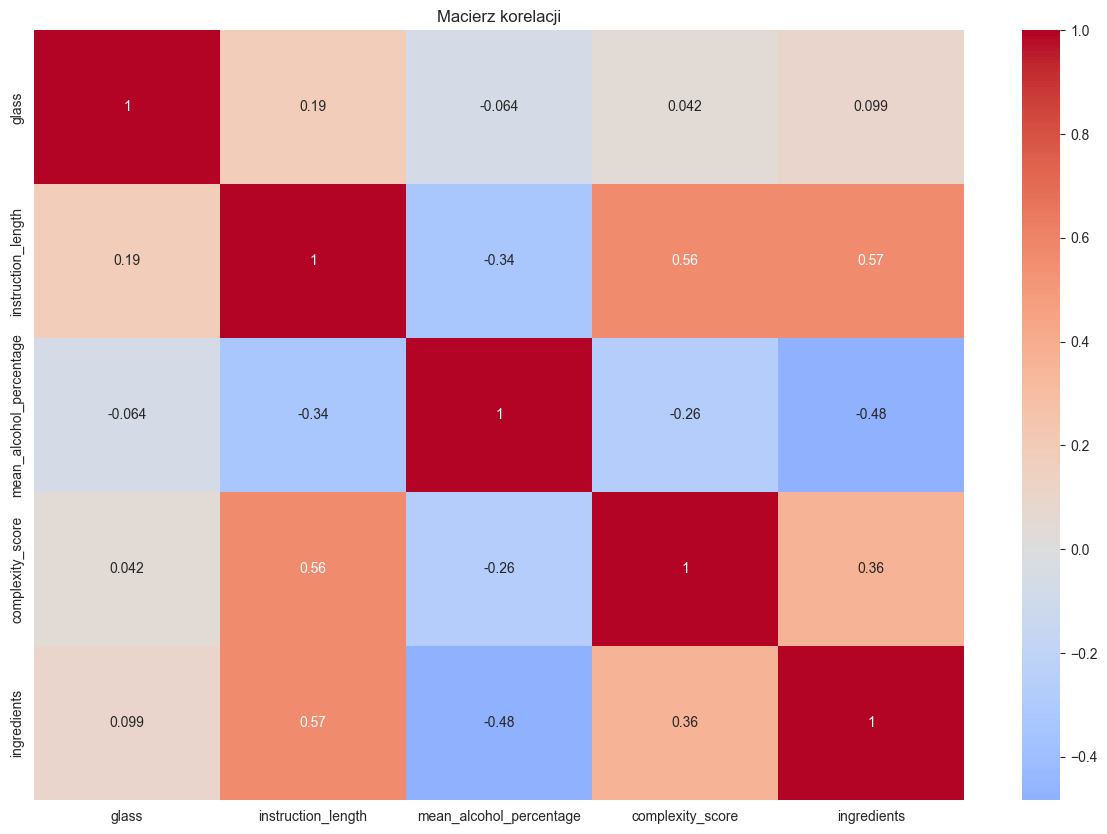

In [69]:
corr_matrix = preprocessed_data[hist_cols].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Macierz korelacji")
plt.show()

Macierz korelacji wskazuje jedynie na dosyć silny wpływ długości instrukcji na złożność przygotowania oraz ilości składników, co jest raczej oczywiste

## 3.Klasteryzacja zbioru danych

Jako algorytm klasteryzacji zbioru został wybrany algorytm Popagacji Podobieństwa (AffinityPropagation), ze względu na uniwersalność w dopasowywaniu kształtów klastrów oraz jego precyzję, którą można wykorzystać ze względu na wielkość zbioru danych. Model został dostrojony za pomocą ręcznego przeszukiwania siatki, dając następujące wyniki : 


Właściwości modelu:
- Preference: -50.0
- Damping: 0.5
- Liczba klastrów: 3
- Indeksy centrów klastrów.: [38 46 72]
- Wskaźnik Silhouette: 0.4961
- Wynik Davisa-Bouldina:  1.174006211752009

Co można uznać za dość ogólnie dobry model, przy 18 cechach zbioru. Podobnie dobre wyniki dawał algorym Mean-Shift, jednakże dzielił on zbiór na 2 klastry, co przy modelu propagacji wypadało gorzej, ze względu na to,że wybrany model posiadał więcej klastrów przy podobym wskaźniku Silhouette, który definiowany jest jako :

$
\begin{align}
S(i) = \frac{b(i) - a(i)}{max(a(i),b(i))}
\end{align}
$


gdzie,
- a(i) jest średnim dystansem z i do innego punktu danych tego samego klastra
- b(i) jest najmniejszym średnim dystansem z i do punktu danych innego klastra

Najlepszym krokiem w celu poprawiena wskaźnik Silhouette, tym samym rozdzielność zbioru jest dodanie nowych danych do zestawu

Dodatkowo posłużyłem się wskaźnikiem Davisa-Bouldina, w celach weryfikacyjnych, co ewaluowało w umiarkowany wynik klasteryzacji

Dane po klasteryzacji prezentują się następująco : 

In [70]:
cluster_data = pd.read_csv("cluster.csv").drop(["Unnamed: 0"],axis=1)
cluster_data

,glass,ingredients,instruction_length,mean_alcohol_percentage,complexity_score,Cocktail,Ordinary Drink,Punch / Party Drink,ingredient_pc1,ingredient_pc2,ingredient_pc3,ingredient_pc4,ingredient_pc5,ingredient_pc6,ingredient_pc7,ingredient_pc8,ingredient_pc9,ingredient_pc10,cluster
0,3,5,177,10,10.0,1,0,0,-0.014982,-0.461044,-0.001451,0.000179,0.001613,-0.000576,-0.001449,-0.000419,0.002629,0.000145,1
1,2,4,218,10,6.0,1,0,0,-0.014982,-0.012421,-0.034134,-0.045671,-0.008036,0.016704,0.007225,0.001757,-0.023009,-0.001688,1
2,3,6,152,20,6.0,0,1,0,-0.014982,-0.002642,-0.011711,-0.026448,-0.012697,0.009632,-0.000429,-0.002246,0.004643,0.000103,1
3,2,3,44,13,4.0,0,1,0,-0.014982,-0.002949,0.052105,0.108178,0.056743,0.001193,-0.006432,-0.076796,-0.047359,0.105207,0
4,2,4,148,10,10.0,0,1,0,-0.014982,-0.003502,-0.015766,0.031992,-0.056972,-0.048061,-0.033045,-0.092794,0.016542,0.032227,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1,3,71,10,6.0,0,1,0,-0.014982,-0.004414,0.017749,-0.004752,-0.032715,0.529239,-0.019800,0.044969,-0.030542,-0.071467,0
130,1,3,72,10,6.0,0,1,0,-0.014982,-0.003971,-0.125697,-0.016535,0.040443,0.045530,0.033738,-0.197780,-0.160128,-0.034412,0
131,5,3,108,4,4.0,0,1,0,-0.014982,-0.004499,-0.003980,-0.010060,-0.030938,0.172418,0.067472,0.009326,-0.020252,0.275584,0
132,1,3,71,13,6.0,0,1,0,-0.014982,-0.003732,0.082738,0.005416,-0.166065,0.001145,0.051062,-0.028881,0.022292,0.058775,0


Zostało stworzonych 3 klastrów, a ich przynależności wyglądają następująco : 

In [71]:
cluster_data["cluster"].value_counts()

cluster
0    76
1    47
2    11
Name: count, dtype: int64

In [72]:
def visualize_cluster_separation(data, labels):
    # Standaryzacja danych
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Redukcja wymiarowości do 2D
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data_scaled)

    # Tworzenie wykresu
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.7)
    
    # Dodanie elips reprezentujących rozkład każdego klastra
    for label in np.unique(labels):
        cluster_points = data_2d[labels == label]
        ellipse = plt.matplotlib.patches.Ellipse(
            xy=cluster_points.mean(axis=0),
            width=2*np.std(cluster_points[:, 0]),
            height=2*np.std(cluster_points[:, 1]),
            angle=45,  # można dostosować
            alpha=0.2
        )
        plt.gca().add_patch(ellipse)

    plt.colorbar(scatter)
    plt.title('Wizualizacja separacji klastrów')
    plt.xlabel('Pierwsza główna składowa')
    plt.ylabel('Druga główna składowa')
    plt.show()


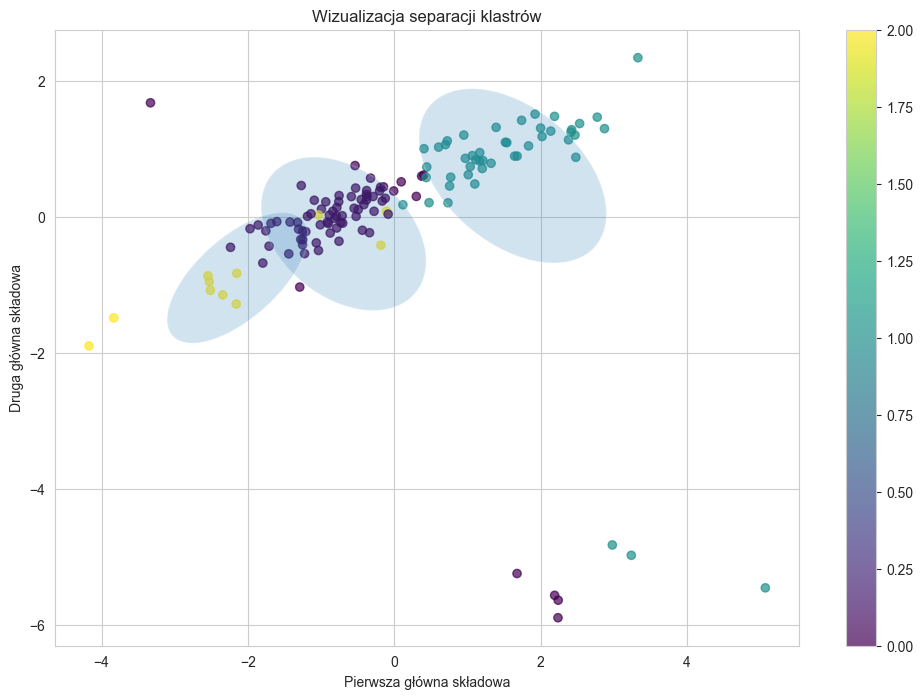

In [73]:
features = cluster_data.drop(["cluster"],axis=1)

visualize_cluster_separation(features,cluster_data["cluster"])

Na podstawie przedstawionego wykresu klasteryzacji można wyciągnąć następujące wnioski:

- Widoczne są trzy główne skupiska (klastry) punktów, co sugeruje, że dane można podzielić na trzy odrębne grupy.
- Klastry są dość dobrze odseparowane od siebie, co wskazuje na skuteczność zastosowanej metody klasteryzacji.
- Dwa większe klastry (po lewej i prawej stronie) są bardziej rozległe i zawierają więcej punktów, podczas gdy trzeci klaster (na dole) jest mniejszy i bardziej zwarty.
- Istnieje kilka punktów odstających, szczególnie widocznych na dole wykresu, które nie pasują do głównych klastrów. Mogą to być szumy lub nietypowe przypadki w danych.
- Kolorystyka punktów sugeruje, że wewnątrz klastrów istnieje pewne zróżnicowanie, co może wskazywać na subtelne różnice między elementami w obrębie tego samego klastra.
- Kształt klastrów jest nieregularny, co może świadczyć o złożoności danych i potencjalnie skomplikowanych relacjach między zmiennymi.
- Oś pozioma (pierwsza główna składowa) wydaje się lepiej rozdzielać klastry niż oś pionowa (druga główna składowa), co sugeruje, że pierwsza składowa ma większy wpływ na grupowanie danych.
- Zastosowanie analizy głównych składowych (PCA) pozwoliło na redukcję wymiarowości danych i wizualizację ich w przestrzeni dwuwymiarowej, zachowując jednocześnie istotne informacje o strukturze danych.

Tak prezentują się wyniki dla poszczególnych klastrów : 

In [74]:
to_describe = cluster_data[["ingredients","instruction_length","mean_alcohol_percentage","complexity_score","cluster"]]
to_describe[to_describe["cluster"] == 0].describe()

,ingredients,instruction_length,mean_alcohol_percentage,complexity_score,cluster
count,76.000000,76.000000,76.000000,76.000000,76.0
mean,3.407895,104.118421,10.578947,5.171053,0.0
std,0.786174,32.145904,2.028222,1.464133,0.0
min,2.000000,44.000000,4.000000,1.000000,0.0
25%,3.000000,76.500000,10.000000,4.000000,0.0
50%,3.000000,103.500000,10.000000,6.000000,0.0
75%,4.000000,119.500000,13.000000,6.000000,0.0
max,6.000000,184.000000,14.000000,8.000000,0.0


In [75]:
to_describe[to_describe["cluster"] == 1].describe()

,ingredients,instruction_length,mean_alcohol_percentage,complexity_score,cluster
count,47.000000,47.000000,47.000000,47.000000,47.0
mean,5.276596,174.829787,8.638298,7.957447,1.0
std,0.771845,45.075453,2.745950,1.693433,0.0
min,3.000000,67.000000,2.000000,4.000000,1.0
25%,5.000000,150.500000,7.000000,6.000000,1.0
50%,5.000000,172.000000,8.000000,8.000000,1.0
75%,6.000000,198.500000,10.000000,10.000000,1.0
max,6.000000,301.000000,20.000000,10.000000,1.0


In [76]:
to_describe[to_describe["cluster"] == 2].describe()

,ingredients,instruction_length,mean_alcohol_percentage,complexity_score,cluster
count,11.000000,11.000000,11.000000,11.000000,11.0
mean,2.181818,94.454545,21.545455,5.636364,2.0
std,0.404520,31.072057,6.439932,2.802596,0.0
min,2.000000,67.000000,14.000000,2.000000,2.0
25%,2.000000,72.000000,20.000000,4.000000,2.0
50%,2.000000,86.000000,20.000000,6.000000,2.0
75%,2.000000,96.500000,21.000000,7.000000,2.0
max,3.000000,155.000000,34.000000,10.000000,2.0


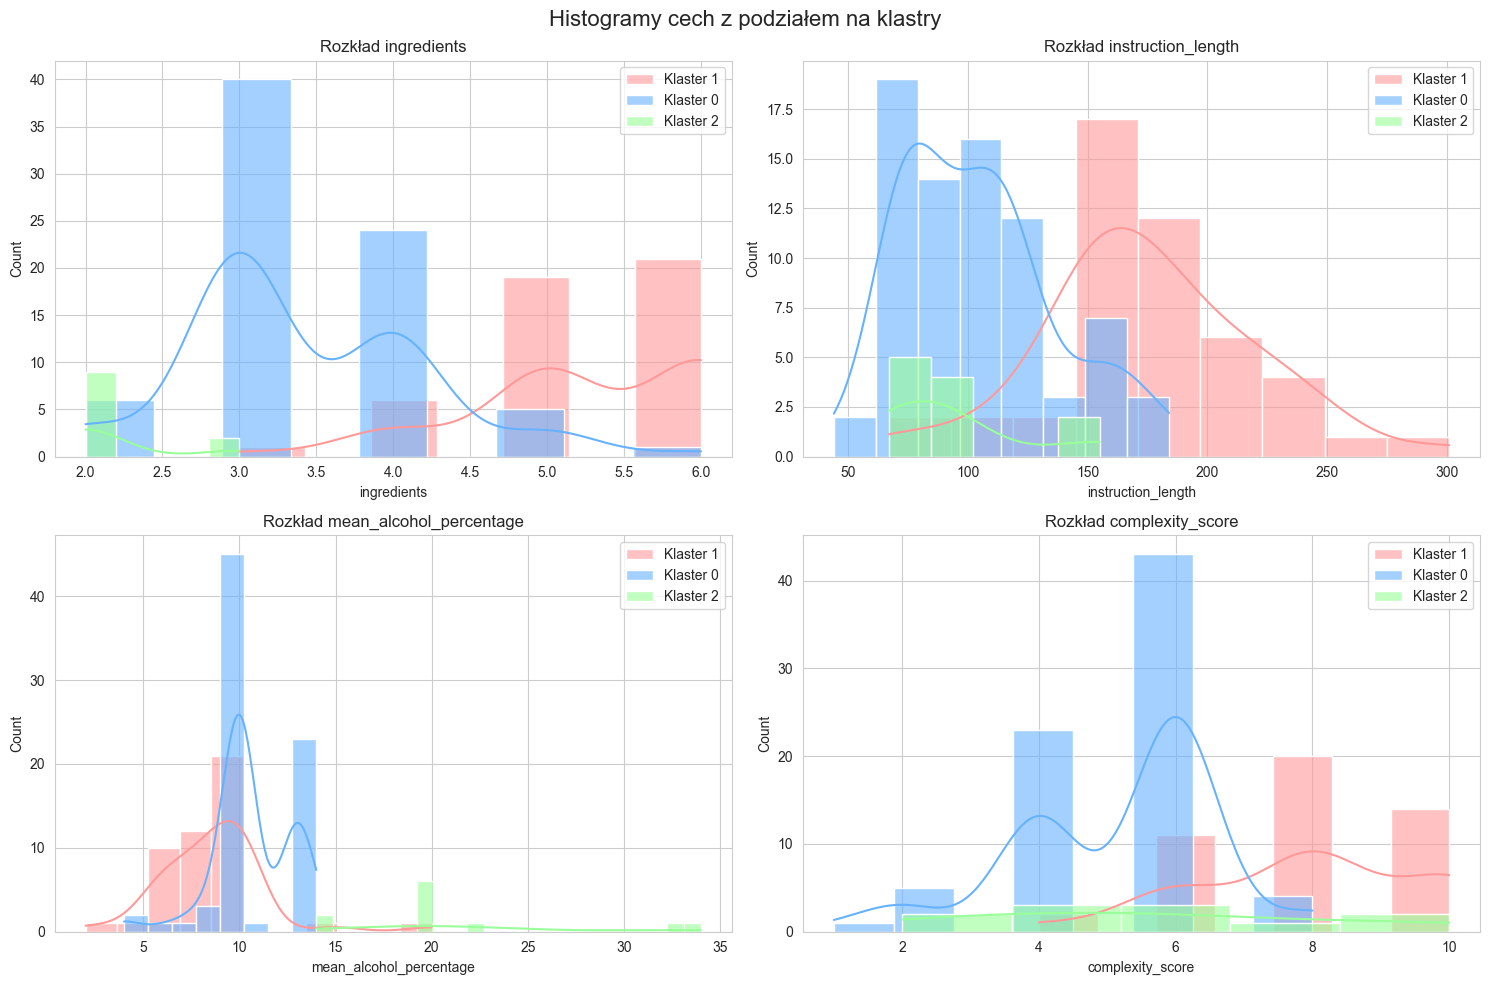

In [77]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Histogramy cech z podziałem na klastry', fontsize=16)

features = ['ingredients', 'instruction_length', 'mean_alcohol_percentage', 'complexity_score']
colors = ['#FF9999', '#66B2FF', '#99FF99']  # Kolory dla każdego klastra

for ax, feature in zip(axes.ravel(), features):
    for i, cluster in enumerate(to_describe['cluster'].unique()):
        cluster_data = to_describe[to_describe['cluster'] == cluster]
        sns.histplot(data=cluster_data, x=feature, ax=ax, color=colors[i], 
                     alpha=0.6, label=f'Klaster {cluster}', kde=True)
    
    ax.set_title(f'Rozkład {feature}')
    ax.legend()

plt.tight_layout()
plt.show()

Na podstawie przedstawionych statystyk dla trzech klastrów można wyciągnąć następujące wnioski:

1. Wielkość klastrów:

- Klaster 0 jest największy (76 elementów)
- Klaster 1 jest średni (47 elementów)
- Klaster 2 jest najmniejszy (11 elementów)

2. Liczba składników (ingredients):

- Klaster 0: średnio 3.4 składników
- Klaster 1: średnio 5.5 składników
- Klaster 2: średnio 2.2 składników

Klaster 1 wydaje się zawierać najbardziej złożone drinki pod względem liczby składników.

3.Długość instrukcji:

- Klaster 0: średnio 104 jednostek
- Klaster 1: średnio 174 jednostek
- Klaster 2: średnio 94 jednostki

Drinki w klastrze 1 mają najdłuższe instrukcje przygotowania.

4.Średnia zawartość alkoholu:

- Klaster 0: 10.6%
- Klaster 1: 8.6%
- Klaster 2: 21.5%

Klaster 2 zawiera drinki o znacznie wyższej zawartości alkoholu.

5.Ocena złożoności:

- Klaster 0: 5.17
- Klaster 1: 7.96
- Klaster 2: 5.64

Drinki w klastrze 1 są oceniane jako najbardziej złożone

Wnioski:

- Klaster 0: Reprezentuje "standardowe" drinki o średniej złożoności i zawartości alkoholu.
- Klaster 1: Zawiera najbardziej złożone drinki z największą liczbą składników i najdłuższymi instrukcjami, ale o niższej zawartości alkoholu.
- Klaster 2: Grupuje mocne drinki o wysokiej zawartości alkoholu, ale relatywnie prostej kompozycji (mniej składników).

Te różnice między klastrami sugerują, że algorytm skutecznie pogrupował drinki według ich charakterystyk, co może być przydatne w analizie preferencji konsumentów, planowaniu menu lub kategoryzacji przepisów na koktajle.